<a href="https://colab.research.google.com/github/pran2681/Zeotap-Assignment/blob/main/Pran_Saikia_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd

customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

print(customers.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [34]:
merged_data = pd.merge(customers, transactions, on='CustomerID')

agg_transactions = merged_data.groupby('CustomerID').agg(
    total_value=('TotalValue', 'sum'),
    avg_value=('TotalValue', 'mean'),
    transaction_count=('TransactionID', 'count')
).reset_index()

customer_data = pd.merge(customers, agg_transactions, on='CustomerID')

print(customer_data.head())


  CustomerID        CustomerName         Region  SignupDate  total_value  \
0      C0001    Lawrence Carroll  South America  2022-07-10      3354.52   
1      C0002      Elizabeth Lutz           Asia  2022-02-13      1862.74   
2      C0003      Michael Rivera  South America  2024-03-07      2725.38   
3      C0004  Kathleen Rodriguez  South America  2022-10-09      5354.88   
4      C0005         Laura Weber           Asia  2022-08-15      2034.24   

   avg_value  transaction_count  
0    670.904                  5  
1    465.685                  4  
2    681.345                  4  
3    669.360                  8  
4    678.080                  3  


In [35]:
customer_data_encoded = pd.get_dummies(customer_data, columns=['Region'], drop_first=True)


print(customer_data_encoded.head())


  CustomerID        CustomerName  SignupDate  total_value  avg_value  \
0      C0001    Lawrence Carroll  2022-07-10      3354.52    670.904   
1      C0002      Elizabeth Lutz  2022-02-13      1862.74    465.685   
2      C0003      Michael Rivera  2024-03-07      2725.38    681.345   
3      C0004  Kathleen Rodriguez  2022-10-09      5354.88    669.360   
4      C0005         Laura Weber  2022-08-15      2034.24    678.080   

   transaction_count  Region_Europe  Region_North America  \
0                  5          False                 False   
1                  4          False                 False   
2                  4          False                 False   
3                  8          False                 False   
4                  3          False                 False   

   Region_South America  
0                  True  
1                 False  
2                  True  
3                  True  
4                 False  


In [36]:
from sklearn.cluster import KMeans

numeric_data = customer_data_encoded.select_dtypes(include=['float64', 'int64'])

kmeans = KMeans(n_clusters=4, random_state=42)
customer_data_encoded['Cluster'] = kmeans.fit_predict(numeric_data)

print(customer_data_encoded[['CustomerID', 'Cluster']].head())


  CustomerID  Cluster
0      C0001        1
1      C0002        1
2      C0003        1
3      C0004        3
4      C0005        1


In [37]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

if 'Cluster' not in customer_data_encoded.columns:
    customer_data_encoded['Cluster'] = kmeans.labels_

numeric_data = customer_data_encoded.select_dtypes(include=['float64', 'int64'])

db_index = davies_bouldin_score(numeric_data, customer_data_encoded['Cluster'])
silhouette_avg = silhouette_score(numeric_data, customer_data_encoded['Cluster'])

print(f'DB Index: {db_index}')
print(f'Silhouette Score: {silhouette_avg}')


DB Index: 0.6022910408086608
Silhouette Score: 0.49625883499054974


Index(['CustomerID', 'CustomerName', 'SignupDate', 'total_value', 'avg_value',
       'transaction_count', 'Region_Europe', 'Region_North America',
       'Region_South America', 'Cluster'],
      dtype='object')


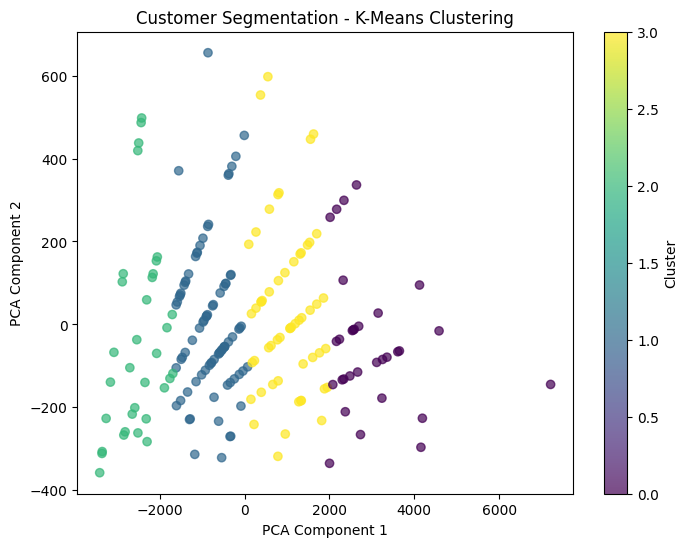

In [38]:
print(customer_data_encoded.columns)

numeric_data = customer_data_encoded.select_dtypes(include=['float64', 'int64'])

numeric_data = numeric_data.drop(columns=[col for col in ['CustomerID', 'Cluster'] if col in numeric_data.columns])

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(numeric_data)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=customer_data_encoded['Cluster'], cmap='viridis', alpha=0.7)
plt.title('Customer Segmentation - K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [39]:
customer_data_encoded[['CustomerID', 'Cluster']].to_csv('Customer_Clusters.csv', index=False)
